# Introduction to Segmentation

In this exercise we will look at different segmentation algorithms.

##  Clustering

One of the basic unsupervised learning approaches is clustering, where the algorithm has to find out which part of the data belongs together in one cluster. 

For segmentation, this data is taken from the pixel values, possible from a neighborhood of the pixels and often by calculating specific features in this region. However, for the moment we will use the raw (color) data of the pixels and possibly also the location and look at features later.

In [1]:
import numpy as np
import skimage
import skimage.data
import skimage.io
import skimage.future
import skimage.segmentation
import sklearn.cluster
import cv2

# for displaying images in jupyter
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
#mpl.rcParams['figure.dpi']= 400




## Exercise 1: Using KMeans for background subtraction on a medical image

In the first exercise, we want to extract the background from an image showning the hands on green background. The image is a sample from out project to detect eczema, however we will only be concerned about finding the background and the hands.

<img src=images/hand_green_small.png width=400px>

This could also be achieved by defining a suitable range of color for either the background or the foreground and use thresholding. We want to find out, if it is also possible using k-Means.

Use kmeans for clustering all the pixels in the image into 2 clusters using only the RGB values.

If we use the raw pixels, the position of the pixels do not matter. You will have to reshape the image into a 1D Array of RGB values and convert them to float.

There are different implementations of kmeans available, most noteworthy an opencv and a sklearn implementation. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


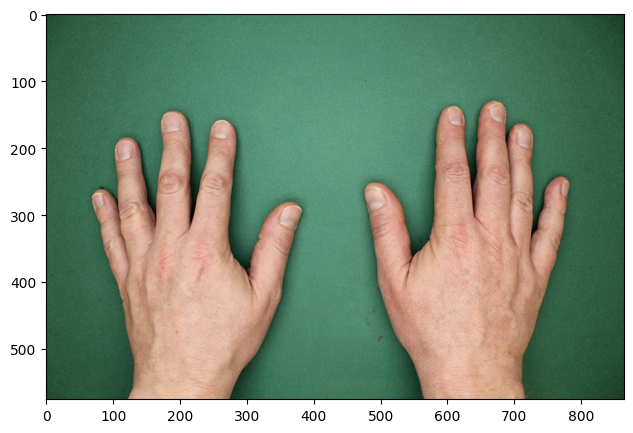

In [2]:
image  = skimage.io.imread('images/images/hand_green_small.png')
plt.imshow(image)

The current shape of the image is: (576, 864, 3)
The type of the image is: uint8


c:\Users\dshus\miniconda3\envs\final\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


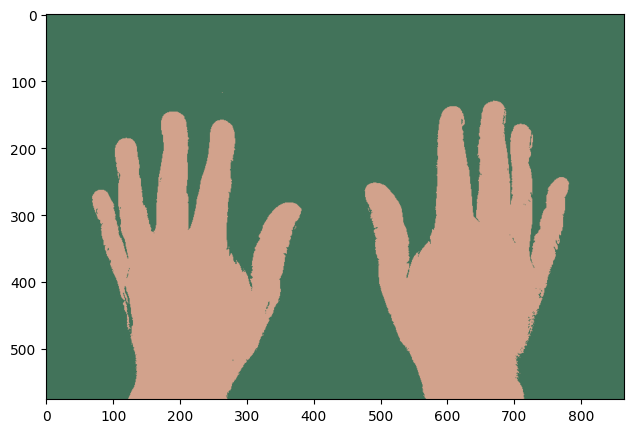

In [3]:
# Use k-means to find 2 clusters and display them
# For displaying you can use either the found cluster centers as colors or overlay the labels, see skimage.color.label2rgb

print(f"The current shape of the image is: {image.shape}")
print(f"The type of the image is: {image.dtype}")

# Reshape the image to a 2D array of pixels and 3 color values (RGB) and cast to float:
data = image.reshape((-1,3)).astype(np.float32)

# Perform k-means clustering
n_clusters = 2
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
kmeans.fit(data)

# Get the color of the cluster centers
center_colors = np.uint8(kmeans.cluster_centers_)

# Get the labels for each pixel and reshape them to the original image size:
labels_image = kmeans.labels_.reshape((image.shape[0], image.shape[1]))

# Display the labels_image
result = center_colors[labels_image]
plt.imshow(result)

### Further questions

How can you find out, if the segmentation was good or not? We can use some performance measure such as 

In [4]:
# Calculate a value that indicates the result of the k-means algorithm. We will use inertia, to see how well
# the clusters are separated. The lower the better.
print(f"The inertia of the k-means algorithm is: {kmeans.inertia_}")


The inertia of the k-means algorithm is: 808396224.0


## Exercise 2: K-Means with multiple labels.

Try the K-Means Algorithmus on the following image to seperate the different colored figures and the gray and black background.

<img src=images/carcassonne_figures.jpg width=400px>

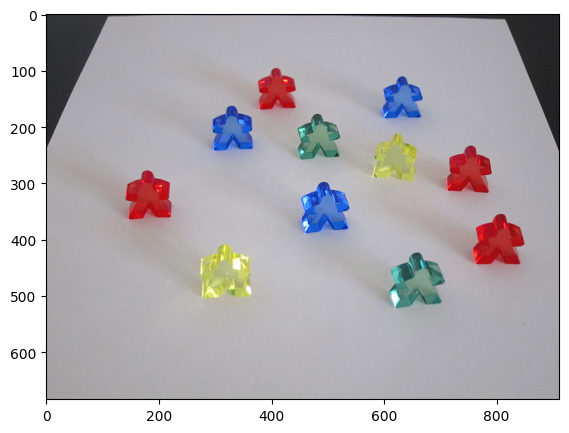

In [5]:
image = skimage.io.imread('images/images/carcassonne_figures.jpg')
data = image.reshape((-1,3)).astype(np.float32)
plt.imshow(image)

c:\Users\dshus\miniconda3\envs\final\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


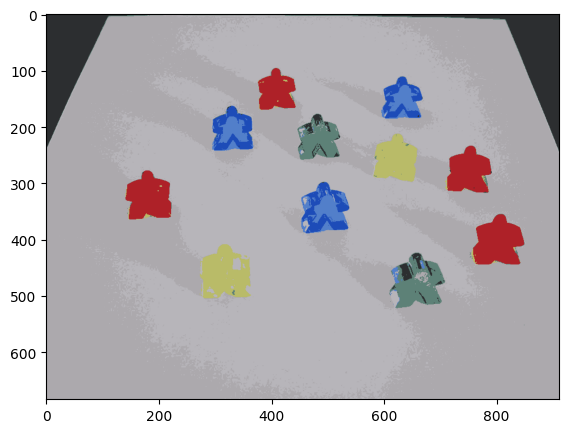

In [6]:
n_clusters = 8
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
kmeans.fit(data)

# Get the color of the cluster centers
center_colors = np.uint8(kmeans.cluster_centers_)

# Get the labels for each pixel and reshape them to the original image size:
labels_image = kmeans.labels_.reshape((image.shape[0], image.shape[1]))

# Display the labels_image
result = center_colors[labels_image]
plt.imshow(result)

### Further questions

Try different values for the number of clusters. What results do you get?

One for the problems is that similar colors with different intensity will end up in different clusters. How could you solve that issue? We will use a different color space in this section. We will use the LAB color space, which is designed to be more similar to the human perception of color. L is the lightness, A is the green-red component and B is the blue-yellow component.

100.0
78.94602557900288
77.70230548998146


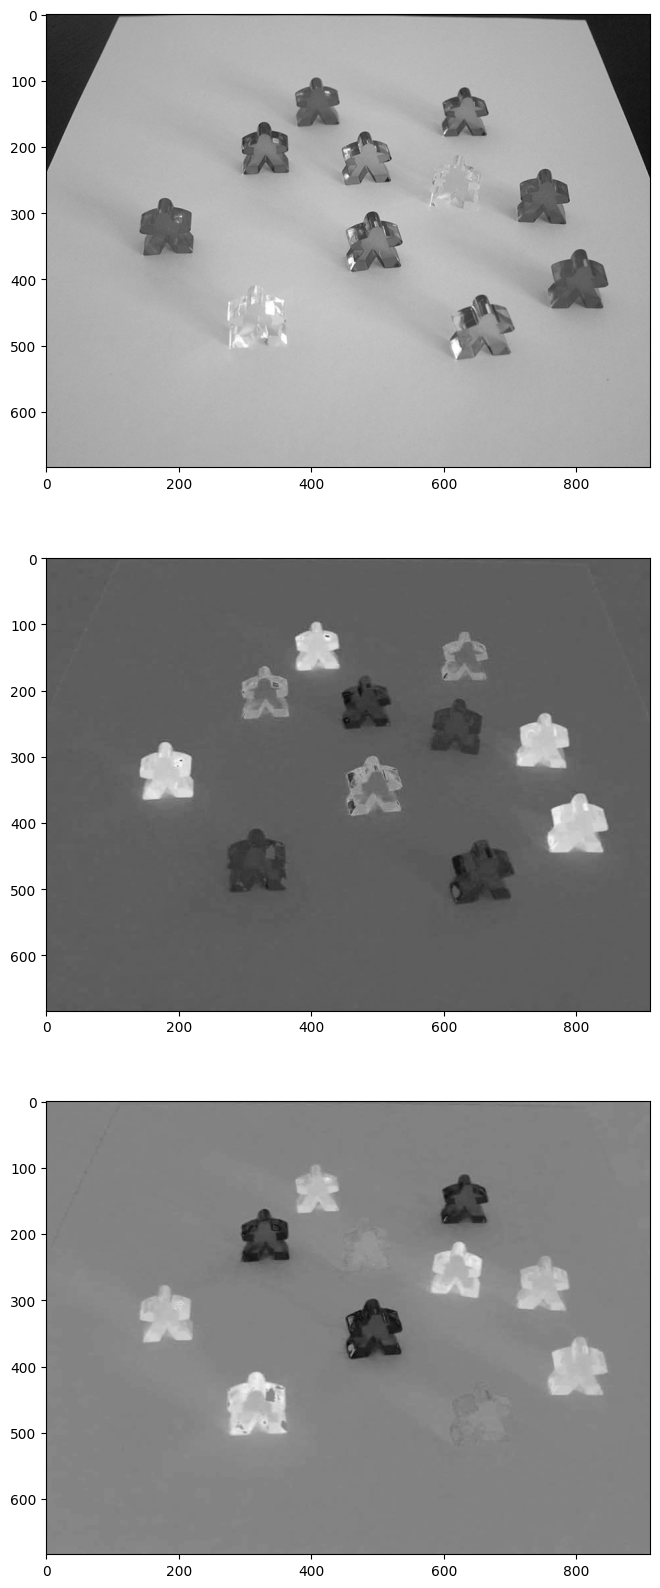

In [7]:
# Use a different color space for k-Means
image_lab = skimage.color.rgb2lab(image)

plt.rcParams['figure.figsize'] = [12, 20]

# Show the L channel:
plt.subplot(3, 1, 1)
plt.imshow(image_lab[:,:,0], cmap='gray')
print(np.max(image_lab[:,:,0]))

# Show the a channel:
plt.subplot(3, 1, 2)
plt.imshow(image_lab[:,:,1], cmap='gray')
print(np.max(image_lab[:,:,1]))

# Show the b channel:
plt.subplot(3, 1, 3)
plt.imshow(image_lab[:,:,2], cmap='gray')
print(np.max(image_lab[:,:,2]))

The shape of the data is: (684, 912, 2)
The shape of the data is: (623808, 2)


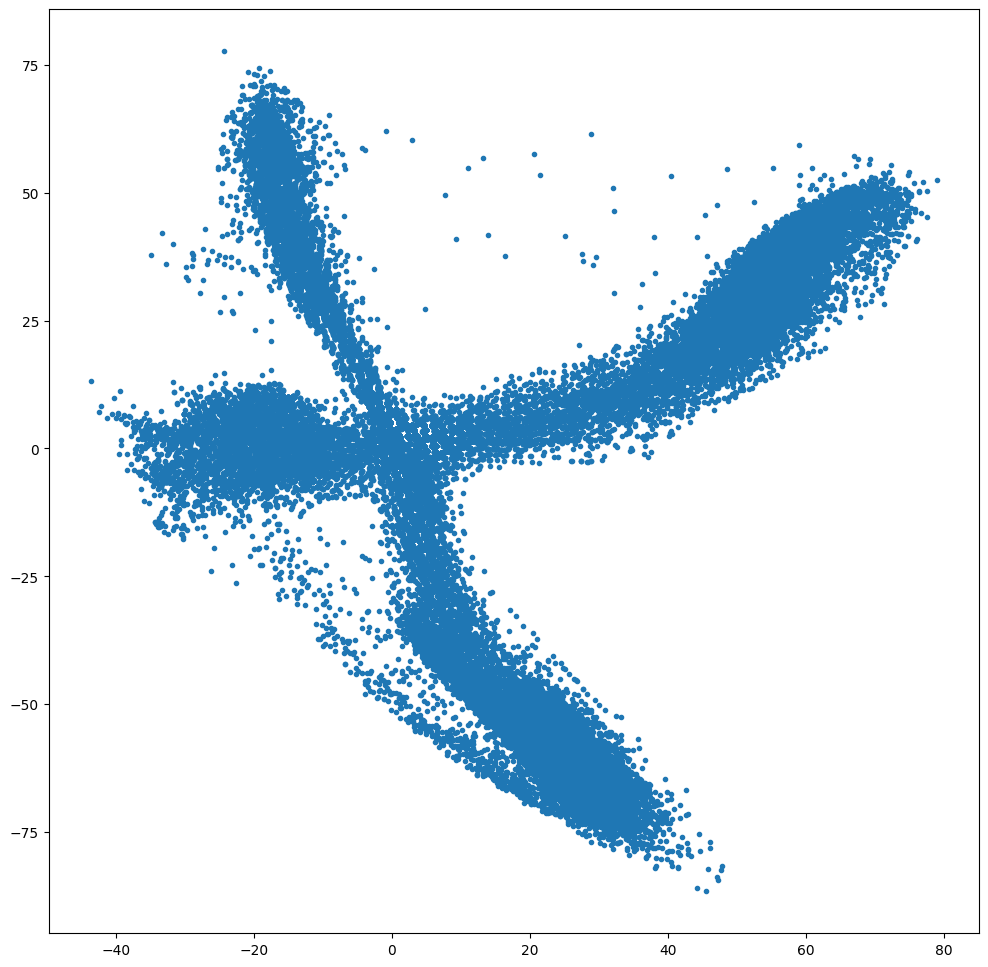

In [12]:
# We remove the L channel and just use the a and b channel for clustering:
# We will first create a scater plot of the a and b channel to see how the data is distributed:

data_2d = image_lab[:,:,1:3]
print(f"The shape of the data is: {data_2d.shape}")
data = data_2d.reshape((-1,2))
print(f"The shape of the data is: {data.shape}")

# Show the scatter plot of the A and B channel:
plt.rcParams['figure.figsize'] = [12, 12]
plt.plot(data[:,0], data[:,1], '.')


c:\Users\dshus\miniconda3\envs\final\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


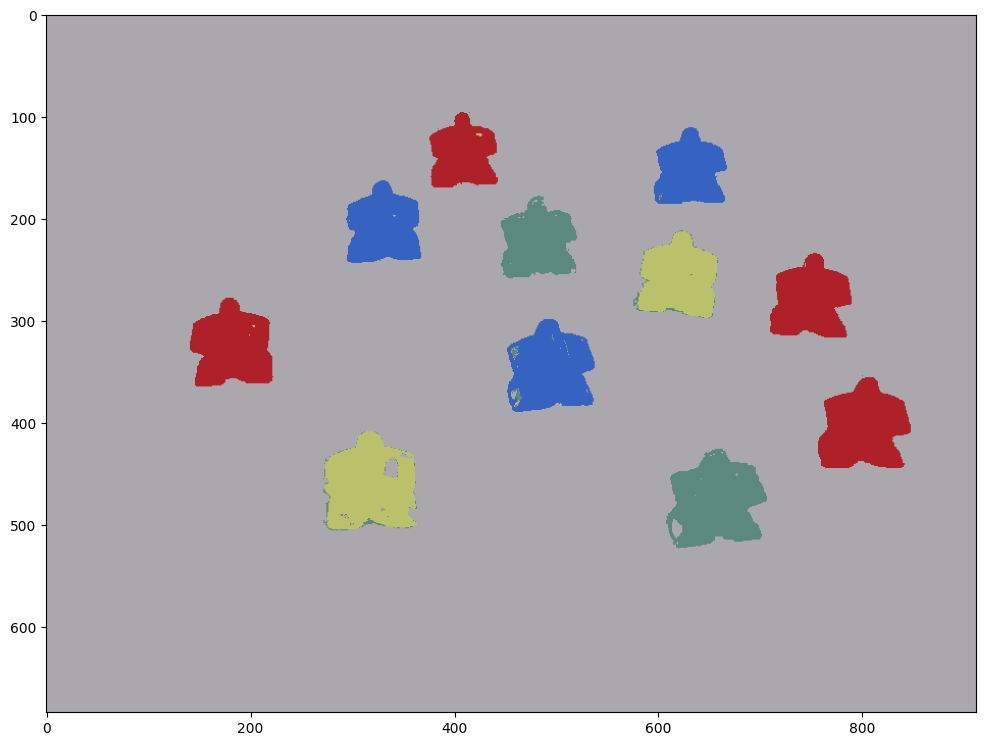

In [17]:
# Lets perform k-means clustering on the a and b channel with 5 clusters:
n_clusters = 5
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
kmeans.fit(data)

# Get the color of the cluster centers
center_colors = np.uint8(kmeans.cluster_centers_)

# Get the labels for each pixel and reshape them to the original image size:
labels_image = kmeans.labels_.reshape((image.shape[0], image.shape[1]))

# Display the labels_image
result = center_colors[labels_image]
# transform the result back to rgb:
plt.imshow(skimage.color.label2rgb(labels_image, image, kind='avg', bg_label=-1))

## Exercise 3: Different segmentations for autonoumous vehicels.  

We want to try out different segmentation algorithms on a more difficult image from a dataset for semantic segmentation for autonomous vehicles:

<img src=images/000041_10.png width=400px>

### Exercise 3.1. k-Means

Try K-Means on this data set.

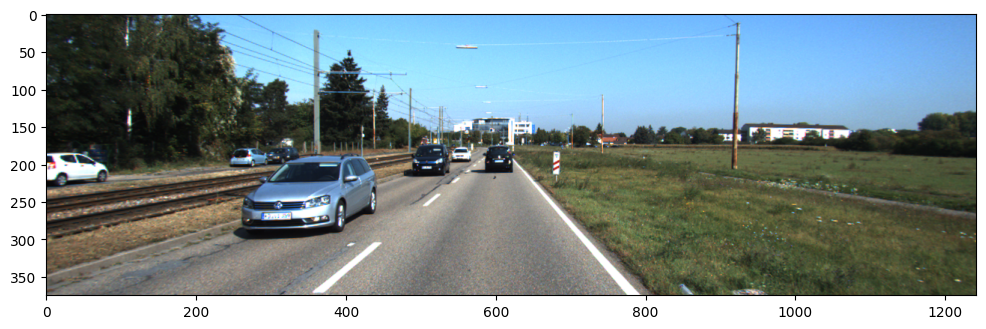

In [20]:
image = skimage.io.imread('images/images/000041_10.png')
data = image.reshape((-1,3)).astype(np.float32)
plt.imshow(image)

c:\Users\dshus\miniconda3\envs\final\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


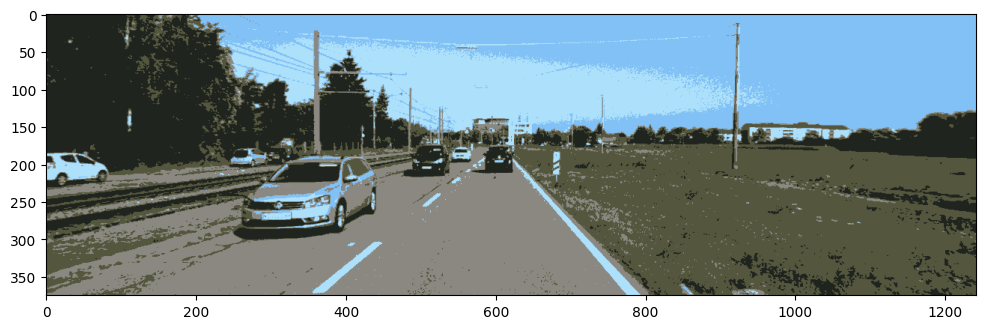

In [21]:
# Perform k-means clustering
n_clusters = 5
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
kmeans.fit(data)

# Get the color of the cluster centers
center_colors = np.uint8(kmeans.cluster_centers_)

# Get the labels for each pixel and reshape them to the original image size:
labels_image = kmeans.labels_.reshape((image.shape[0], image.shape[1]))

# Display the labels_image
result = center_colors[labels_image]
plt.imshow(result)


### Exercise 3.2: Superpixel segmentation

The skimage library has methods that directly segment the images into clusters using both the pixel coordinates and the color. Such methods are often used as a preliminary processing step of clustering an image into so called superpixel which can then be input into a further, often graph based, segmentation algorithm.

Try this segmentation using 
http://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic



(375, 1242)
772


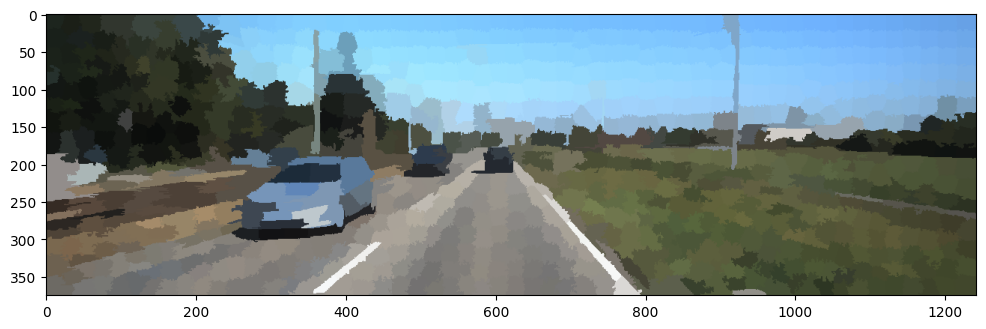

In [24]:
# This splits the image into super-pixels. n_segments=num of super-pixels
# compactness of the super-pixels
labels = skimage.segmentation.slic(image, n_segments=1000, compactness=10)
print(labels.shape)
# Number of unique segments
print(np.max(labels))
plt.imshow(skimage.color.label2rgb(labels, image, kind='avg'))

### Exercise 3.3: GraphCut

The skimage packages contains a graph cut algorithms to segment a (superpixel) image using the graph cut algorithms.

To use is, first the *Region Adjacency Graph* of the segmented superpixels must be constructed:

http://scikit-image.org/docs/dev/api/skimage.future.graph.html#skimage.future.graph.rag_mean_color

and then the graph cut algorithms can be applied:

http://scikit-image.org/docs/dev/api/skimage.future.graph.html

Use both methods to segment the result of the superpixel segmentation using graph cuts and display the result.


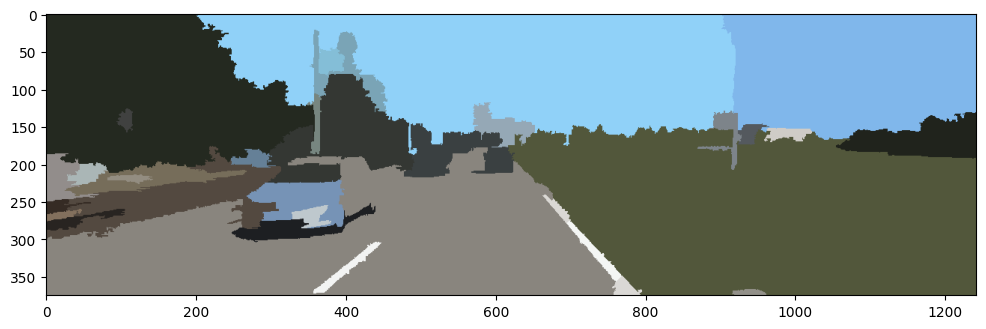

In [27]:
# Creates a graph (Region Adjacency Graph) of the segmented super-pixels:
graph = skimage.graph.rag_mean_color(image, labels, mode='similarity')

# Performs a normalized cut on the graph:
labels2 = skimage.graph.cut_normalized(labels, graph, in_place=False)
plt.imshow(skimage.color.label2rgb(labels2, image, kind='avg'))

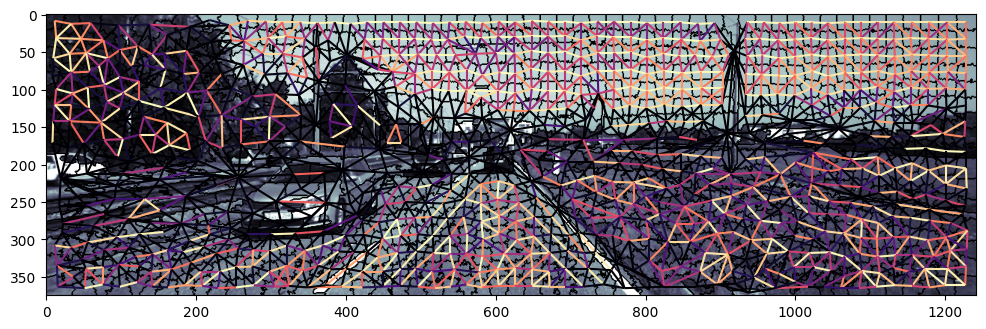

In [28]:
# Show the graph:
skimage.graph.show_rag(labels, graph, image)

### Exercise 3.4: Mean Shift Segmentation

OpenCV contains a method to directly calculate a mean shift segmentation from an image:

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html

Apply this method on the (original) image above and evaluate the result. Check the different parameter settings of the algorithm.



## Exercise 4 (optional): k-Means with position and color

Implement a k-Means clustering that uses the position of a pixel together with the color for clustering.
